# ML Lab-1, Exercise-2
* Siddharth Singh
* Batch A1
* Roll No - 200968106

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Importing Dataset

In [2]:
data = pd.read_csv("boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Removing unnecessary column
data.drop(("Unnamed: 0"), axis=1, inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Correlation Matrix

<AxesSubplot:>

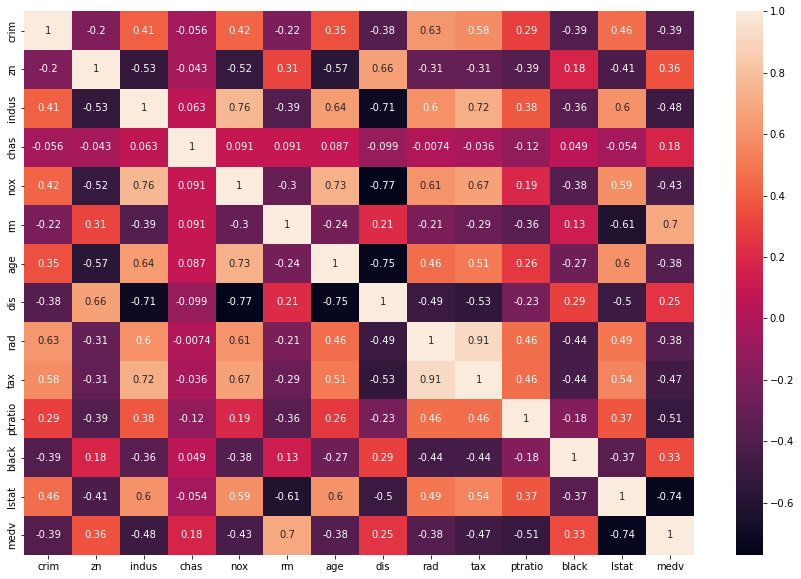

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot = True)

### Important 5 features 
* rm
* lstat
* ptratio
* indus
* tax

### Top 4 features
* rm
* lstat
* ptratio
* indus

In [17]:
# X dataset
X = data[['rm', 'lstat', 'ptratio', 'indus']]
X.head()

,rm,lstat,ptratio,indus
0,6.575,4.98,15.3,2.31
1,6.421,9.14,17.8,7.07
2,7.185,4.03,17.8,7.07
3,6.998,2.94,18.7,2.18
4,7.147,5.33,18.7,2.18


In [18]:
# y dataset
y = data[["medv"]]
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Spliting into Train and Test dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
print("Score of Linear Regression using Training data: ", reg.score(X_train, y_train))
print("Score of Linear Regression using  Testing data: ", reg.score(X_test,  y_test))

Score of Linear Regression using Training data:  0.6866881152922459
Score of Linear Regression using  Testing data:  0.628420675407839


# Coefficient and Intercept Value

In [22]:
# Coefficient Value
print(reg.coef_)

# Intercept Value
print(reg.intercept_)

[[ 4.93755099 -0.58085937 -0.87910694  0.02624261]]
[14.6629527]


# Predicted Value on Test data

In [23]:
# Predicted values

y_pred = reg.predict(X_test)

# Calculation Mean Squared Error and Root Mean Squared Error

In [24]:
# Calculating Mean Squared Error
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Squared Error on Test data: ", lin_rmse)

Root Mean Squared Error on Test data:  5.2200878935608745


# Calculating R^2 Square Value 

In [25]:
# Calculating the r^2 score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.628420675407839